In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = True
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/REAL_samples/deconprepare/corr_among_gt/allgtsummary/whatwrong/firstflow'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['m8', 'm4', 'CD8', 'Tr', 'NK', 'nB', 'CD4', 'mB', 'Mn']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)
display(df_pearson)

df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

,7pbmc_firstflow_m8real2.txt_7pbmc_firstflow_m8real2.txt,7pbmc_firstflow_m8real2.txt_7pbmc_cytof_m8real2.txt,7pbmc_firstflow_m8real2.txt_7pbmc_secondflow_m8real2.txt
m8,1.0,0.712100,0.988802
m4,1.0,0.899463,0.920092
CD8,1.0,0.923935,0.994301
Tr,1.0,0.120980,0.908880
NK,1.0,0.980744,0.286073
nB,1.0,-0.367254,0.069293
CD4,1.0,0.890279,0.955177
mB,1.0,0.667351,0.831391
Mn,1.0,0.079484,0.875967


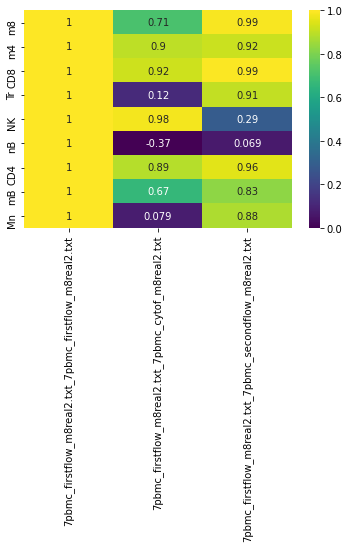

In [7]:
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

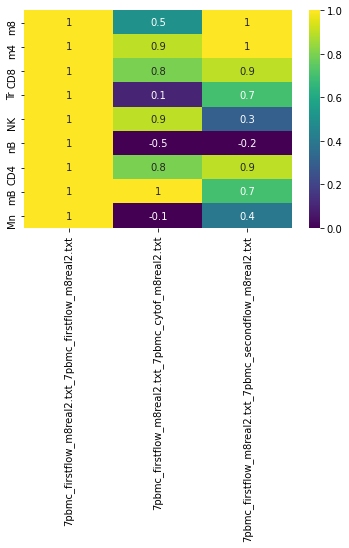

In [8]:
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')